# **Часть 1**

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [124]:
data = pd.read_csv('HW1_var_10.csv', sep = ';')
data = data.drop('Номер варианта', axis = 1) # Сразу убрала номер варианта как техническую переменную
data.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000010,2НДФЛ,Покупка автомобиля,1,0.39,мужской,0,0,среднее-специальное,рабочий,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000030,Поступление зарплаты на счет,Покупка автомобиля,1,0.39,женский,1,0,Высшее/Второе высшее/Ученая степень,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000050,2НДФЛ,Ремонт,1,0.31,женский,0,0,незаконченное высшее,специалист,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000070,2НДФЛ,Покупка земли,1,NaN,женский,1,0,второе высшее,другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000090,2НДФЛ,Ремонт,0,0.47,женский,0,0,высшее,торговый представитель,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на изначальную корреляцию переменных до обработки

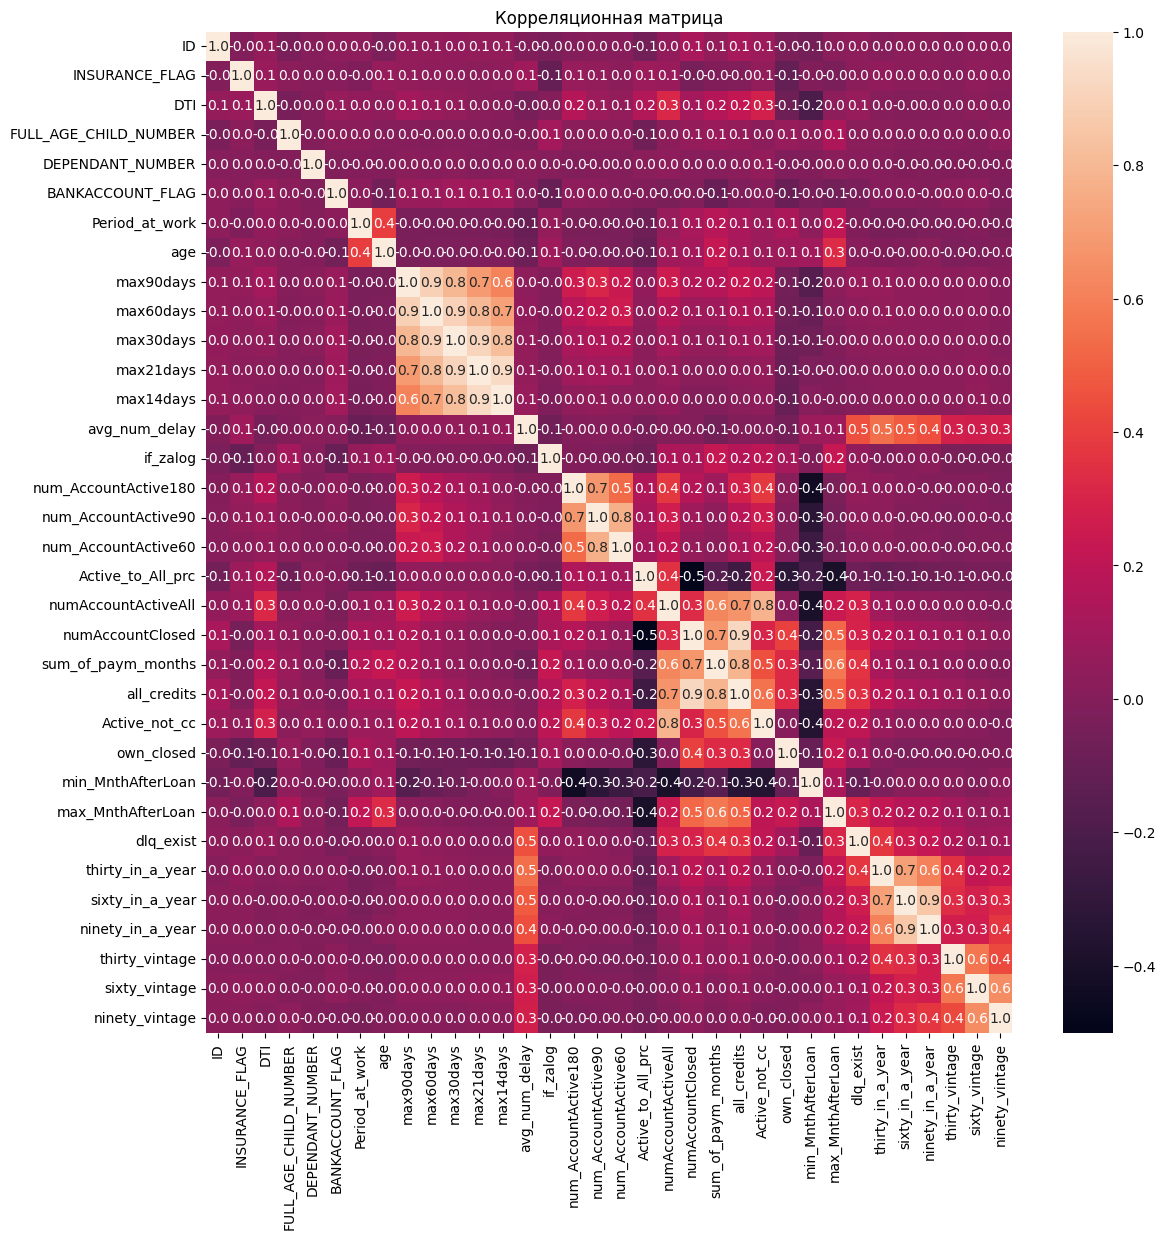

In [125]:
plt.figure(figsize = (13, 13))
plt.title('Корреляционная матрица')
sns.heatmap(data.corr(), annot = True, fmt='.1f');

Из матрицы корреляций можно сделать следующие выводы:


*   Переменные "max90days", "max60days", "max30days", "max21days" и "max14days" имеют сильную положительную корреляцию. Это может объясняться тем, что значения одной переменной "вложены" в другую: те клиенты, у которых просрочка 60 дней уже имеют просрочку в 30 дней и так далее;
*   Сильную корреляцию (0.8) имеют переменные numAccountActiveAll и Active_not_cc. Это вполне понятно, ведь общее количество открытых счетов и количество открытых счетов без кредитных карт имеет очевидную линейную связь;
*   Достаточно сильную отрицательную корреляцию (-0.5) имеют переменные Active_to_All_prc  и numAccountClosed. Наблюдаемая отрицательная связь не вызывает вопросов, так как понятно, что чем больше аккаунтов закрывается, тем меньше число активных.






In [126]:
data.dtypes # Видим, что некоторые категориальные переменные воспринимаются как количественные

ID                         int64
INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG             int64
DTI                      float64
SEX                       object
FULL_AGE_CHILD_NUMBER      int64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG         float64
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                 float64
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiveAll      float64
numAccountClosed         float64
sum_of_pay

In [127]:
# Проверяем уникальные значения по каждой из переменных, чтобы выявить возможные проблемы
unique_values = {}

for column in data.columns:
    unique_values[column] = data[column].unique()

unique_values

{'ID': array([1000010, 1000030, 1000050, ..., 1204810, 1204830, 1204850]),
 'INCOME_BASE_TYPE': array(['2НДФЛ', 'Поступление зарплаты на счет',
        'Свободная форма с печатью работодателя',
        'Форма банка (без печати работодателя)', nan], dtype=object),
 'CREDIT_PURPOSE': array(['Покупка автомобиля', 'Ремонт', 'Покупка земли',
        'Покупка недвижимости/ строительство', 'Другое', 'Покупка мебели',
        'Обучение', 'Отпуск', 'Лечение', 'Покупка бытовой техники'],
       dtype=object),
 'INSURANCE_FLAG': array([1, 0]),
 'DTI': array([0.39, 0.31,  nan, 0.47, 0.59, 0.52, 0.49, 0.43, 0.38, 0.45, 0.25,
        0.17, 0.36, 0.23, 0.46, 0.48, 0.22, 0.29, 0.5 , 0.3 , 0.32, 0.27,
        0.21, 0.58, 0.14, 0.28, 0.18, 0.4 , 0.11, 0.35, 0.33, 0.2 , 0.37,
        0.44, 0.55, 0.34, 0.41, 0.57, 0.51, 0.42, 0.26, 0.56, 0.12, 0.53,
        0.13, 0.08, 0.54, 0.16, 0.1 , 0.06, 0.15, 0.09, 0.19, 0.03, 0.24,
        0.04, 0.07, 0.01, 0.05, 0.02, 0.68]),
 'SEX': array(['мужской', 'женский'], 

Обнаружили, что в переменных EDUCATION и EMPL_SIZE пропуски обозначаются как '* n.a.*'. Я посчитала нужным сначала исправить это заменой на np.NaN, чтобы при дальнейшем подсчете пропущенных значений получить корректный результат.

In [128]:
data[data == '*n.a.*'].count().head()

ID                  0
INCOME_BASE_TYPE    0
CREDIT_PURPOSE      0
INSURANCE_FLAG      0
DTI                 0
dtype: int64

In [129]:
data['EDUCATION'].replace('*n.a.*', np.NaN, inplace = True)
data['EMPL_SIZE'].replace('*n.a.*', np.NaN, inplace = True)


In [130]:
data[data == '*n.a.*'].count().head()

ID                  0
INCOME_BASE_TYPE    0
CREDIT_PURPOSE      0
INSURANCE_FLAG      0
DTI                 0
dtype: int64

In [131]:
nan = data.isnull().sum().to_frame() # Пропущенные значения
percent_nan = ((nan.T/len(data)).T)*100
percent_nan = percent_nan.rename(columns = {0:'Percent_nan'})
percent_nan.head()

,Percent_nan
ID,0.000000
INCOME_BASE_TYPE,0.781021
CREDIT_PURPOSE,0.000000
INSURANCE_FLAG,0.000000
DTI,1.396075


In [132]:
null = data[data==0].count().to_frame() # Нулевые значения
percent_null = ((null.T/len(data)).T)*100
percent_null = percent_null.rename(columns = {0:'Percent_null'})
percent_null.head()

,Percent_null
ID,0.000000
INCOME_BASE_TYPE,0.000000
CREDIT_PURPOSE,0.000000
INSURANCE_FLAG,38.855804
DTI,0.000000


In [133]:
unique = data.nunique().to_frame() # Уникальные значения
percent_unique = ((unique.T/len(data)).T)*100
percent_unique = percent_unique.rename(columns = {0:'Percent_unique'})
percent_unique.head()

,Percent_unique
ID,100.000000
INCOME_BASE_TYPE,0.039051
CREDIT_PURPOSE,0.097628
INSURANCE_FLAG,0.019526
DTI,0.585766


In [134]:
table = unique.reset_index().merge(
    percent_unique.reset_index(), on = 'index', how = 'left').merge(
        null.reset_index(), on = 'index', how = 'left').merge(
            percent_null.reset_index(), on = 'index', how = 'left').merge(
                nan.reset_index(), on = 'index', how = 'left').merge(
                    percent_nan.reset_index(), on = 'index', how = 'left')
table = table.rename(columns = {'index':'Variable', '0_x':'Unique', '0_y':'Null', 0:'NaN'})
table.head()

,Variable,Unique,Percent_unique,Null,Percent_null,NaN,Percent_nan
0,ID,10243,100.000000,0,0.000000,0,0.000000
1,INCOME_BASE_TYPE,4,0.039051,0,0.000000,80,0.781021
2,CREDIT_PURPOSE,10,0.097628,0,0.000000,0,0.000000
3,INSURANCE_FLAG,2,0.019526,3980,38.855804,0,0.000000
4,DTI,60,0.585766,0,0.000000,143,1.396075


* Изначальный датасет имеет 10243 строки. При этом в данных имеется значительное количество пропусков. У большинства переменных их доля превышает 62% от общего числа наблюдений.
* Наибольшее количество нулевых значений можем наблюдать у категориальных переменных, где они несут смысловую нагрузку, обозначая одну из категорий.
* Максимальная доля уникальных значений составляет 10% от всей выборки, в основном же у других переменных она не достигает и 1%. Это объяснимо и привычно для категориальных переменных с фиксированным числом значений, но достаточно необычно для количественных, где разброс может быть гораздо больше.

Заметили, что в переменной EMPL_SIZE есть очень схожие по смыслу значения > 100 и >=100. Было решено объединить их для облегчения дальнейшей интерпретации результатов.


In [135]:
data.replace('>100', '>=100', inplace = True)

Переменная BANKACCOUNT_FLAG имеет 5 уникальных значений, однако в описании переменных дана следующая кодировка:


*   0 - нет онлайн-кабинета
*   1 - есть один онлайн-кабинет
*   2+ - заходил в онлайн-кабинет с другого устройства

Для удобства работы с данными было принято решение объединить значения 2, 3, 4 в одно: 2.





In [136]:
data['BANKACCOUNT_FLAG'].value_counts()


0.0    6256
1.0    1008
3.0     672
4.0       2
2.0       1
Name: BANKACCOUNT_FLAG, dtype: int64

In [137]:
data['BANKACCOUNT_FLAG'].replace([2, 3, 4], 2, inplace = True)
data['BANKACCOUNT_FLAG'].value_counts()

0.0    6256
1.0    1008
2.0     675
Name: BANKACCOUNT_FLAG, dtype: int64

In [138]:
data.describe() # Смотрим значения статистических показателей до обработки пропусков и изменения типов данных

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,1.024300e+04,10243.000000,10100.000000,10243.000000,10243.00000,7939.000000,7937.000000,7939.000000,3829.000000,3829.000000,...,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,1.102430e+06,0.611442,0.384682,0.556282,0.00576,0.297015,66.544412,36.221313,1.627579,1.160094,...,0.740503,13.759777,61.668156,0.582123,0.158101,0.086034,0.064525,0.032402,0.012849,0.013687
std,5.914087e+04,0.487446,0.138712,0.766685,0.09304,0.615541,66.462733,8.660910,1.945638,1.610674,...,1.092013,15.145171,30.152855,0.493279,0.364886,0.280453,0.245720,0.177091,0.112639,0.116205
min,1.000010e+06,0.000000,0.010000,0.000000,0.00000,0.000000,4.000000,23.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.051220e+06,0.000000,0.280000,0.000000,0.00000,0.000000,20.000000,29.000000,0.000000,0.000000,...,0.000000,4.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.102430e+06,1.000000,0.400000,0.000000,0.00000,0.000000,46.000000,34.000000,1.000000,1.000000,...,0.000000,9.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.153640e+06,1.000000,0.490000,1.000000,0.00000,0.000000,87.000000,42.000000,2.000000,2.000000,...,1.000000,18.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.204850e+06,1.000000,0.680000,6.000000,3.00000,2.000000,521.000000,61.000000,29.000000,29.000000,...,7.000000,171.000000,171.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Видим странность в данных по переменным min_MnthAfterLoan и	max_MnthAfterLoan. Они отвечают за время, но минимум имеют в -1. Это может объясняться тем, что клиенты взяли кредит, начиная со следующего месяца. Удалять эти переменные нецелесообразно, так как они пригодятся для дальнейшей RFM сегментации.

Удаляем пропуски в категориальных переменных, так как восстановление значений может привести к искажениям.

In [139]:
data.dropna(subset = ['ID', 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'SEX', 'EDUCATION', 'EMPL_TYPE',
                      'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog',
                      'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year',	'ninety_in_a_year',	'thirty_vintage',
                      'sixty_vintage',	'ninety_vintage'], inplace = True)

После удаления пропусков в категориальных переменных необходимо заполнить их в количественных. Для этого воспользвались методом Импутации "среднего", или "наиболее ожидаемого" значения.

In [140]:
data.fillna(data.mean(), inplace = True)

Меняем тип категориальных переменных на object, так как некоторые из них воспринимаются как количественные. Это необходимо для корректного получения дамми-переменных в дальнейшем.

In [141]:
data[['INSURANCE_FLAG', "BANKACCOUNT_FLAG",'if_zalog', 'dlq_exist','ninety_in_a_year','ninety_vintage','sixty_in_a_year',
      'sixty_vintage','thirty_vintage','thirty_in_a_year']] = data[['INSURANCE_FLAG', 'BANKACCOUNT_FLAG','if_zalog',
                                                                   'dlq_exist','ninety_in_a_year',
                                                                   'ninety_vintage','sixty_in_a_year', 'sixty_vintage',
                                                                   'thirty_vintage','thirty_in_a_year']].astype(object)

In [142]:
data.dtypes

ID                         int64
INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG            object
DTI                      float64
SEX                       object
FULL_AGE_CHILD_NUMBER      int64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG          object
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                  object
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiveAll      float64
numAccountClosed         float64
sum_of_pay

В переменной EDUCATION содержится значение, объединяющее в себе три других. Удаление его нецелесообразно вследствие того, что количество этих значений в датасете слишком велико, поэтому заменяем.

In [143]:
data['EDUCATION'].replace('Высшее/Второе высшее/Ученая степень', 'высшее', inplace = True)
data['EDUCATION'].value_counts()

высшее                  2580
среднее-специальное      563
среднее                  168
незаконченное высшее     132
второе высшее            115
ученая степень             7
Неполное среднее           2
Name: EDUCATION, dtype: int64

**Итоговая витрина**

In [144]:
data.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
2,1000050,2НДФЛ,Ремонт,1,0.31,женский,0,0,незаконченное высшее,специалист,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1000150,Свободная форма с печатью работодателя,Ремонт,0,0.47,мужской,0,0,высшее,вспомогательный персонал,...,1.0,9.0,86.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11,1000230,2НДФЛ,Ремонт,1,0.49,женский,0,0,высшее,специалист,...,0.0,3.0,38.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
13,1000270,Форма банка (без печати работодателя),Ремонт,1,0.45,мужской,0,0,незаконченное высшее,вспомогательный персонал,...,1.0,19.0,101.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1000290,Свободная форма с печатью работодателя,Ремонт,1,0.25,мужской,0,0,высшее,менеджер среднего звена,...,0.0,13.0,68.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [147]:
data.select_dtypes(exclude = object).drop('ID', axis = 1).describe() # Смотрим значения статистических показателей после обработки пропусков

,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,...,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan
count,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,...,3567.00000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000
mean,0.391046,0.529857,0.007009,57.730306,35.798991,1.627561,1.131350,0.828235,0.602863,0.479652,...,0.10457,0.427058,2.227082,3.587609,82.631904,5.814971,1.103729,0.741800,13.763947,61.633866
std,0.136467,0.753487,0.098822,57.532143,8.419572,1.964404,1.606434,1.381400,1.166105,1.031103,...,0.34563,0.291571,1.665531,3.215148,71.164143,4.079066,1.070643,1.093138,15.166576,30.153476
min,0.010000,0.000000,0.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000
25%,0.290000,0.000000,0.000000,18.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.222222,1.000000,1.000000,30.500000,3.000000,0.000000,0.000000,4.000000,35.000000
50%,0.400000,0.000000,0.000000,40.000000,34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.400000,2.000000,3.000000,65.000000,5.000000,1.000000,0.000000,9.000000,67.000000
75%,0.490000,1.000000,0.000000,78.000000,42.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,0.00000,0.600000,3.000000,5.000000,114.000000,8.000000,2.000000,1.000000,18.000000,87.000000
max,0.590000,4.000000,2.000000,521.000000,61.000000,29.000000,29.000000,29.000000,29.000000,27.000000,...,3.00000,1.000000,13.000000,28.000000,584.000000,34.000000,7.000000,7.000000,171.000000,171.000000


In [149]:
data.select_dtypes(exclude = object).median().to_frame().drop('ID').rename(columns = {0:'Median'}) # Отдельно рассчитываем медиану по обработанным данным, так как .describe() нам ее не считает

,Median
DTI,0.400000
FULL_AGE_CHILD_NUMBER,0.000000
DEPENDANT_NUMBER,0.000000
Period_at_work,40.000000
age,34.000000
max90days,1.000000
max60days,1.000000
max30days,0.000000
max21days,0.000000
max14days,0.000000


**Наиболее частый клиент согласно модальным и средним значениям**

In [150]:
# Для категориальных переменных нашли моду, для количественных более корректно было взять среднее значение.
mode = data.select_dtypes(include = 'object').mode().loc[0].to_frame()
mean = data.drop('ID', axis = 1).select_dtypes(exclude = 'object').mean()
frames = [mode, mean]
client = pd.concat(frames)
client.rename(columns = {0:'Характеристики наиболее частого клиента'}, inplace = True)
client

,Характеристики наиболее частого клиента
INCOME_BASE_TYPE,Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт
INSURANCE_FLAG,1
SEX,мужской
EDUCATION,высшее
EMPL_TYPE,специалист
EMPL_SIZE,>250
BANKACCOUNT_FLAG,0.0
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО


**Согласно полученным модам и средним, профиль наиболее частого клиента выглядит следующим образом:**

* Женатый мужчина 36 лет;
* Специалист с высшим образованием и заработной платой более 250 тыс. руб. в месяц;
* Берущий кредит с целью ремонта со страховкой и без залога;
* Минимальное время, прошедшее с оформления последнего кредита, равняется 14 месяцам;
* У работодателя ООО в сфере Торговли;
* Сумма платежей за последний месяц составила 83 тыс. руб.


Посмотрим на распределения категориальных переменных

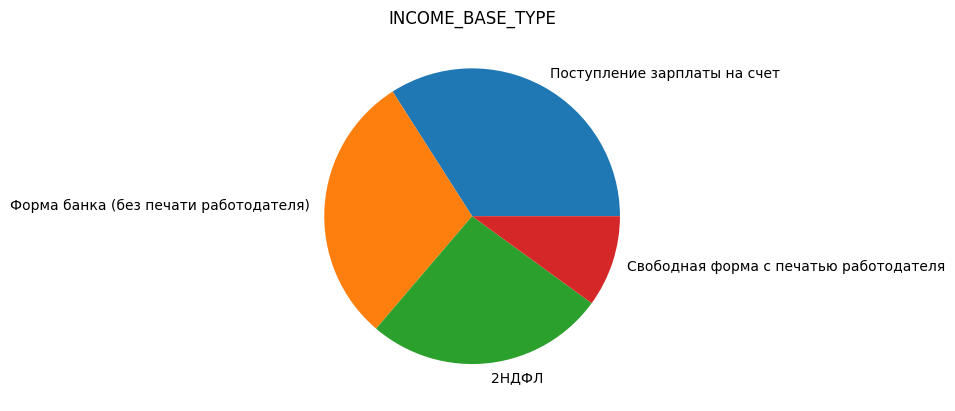

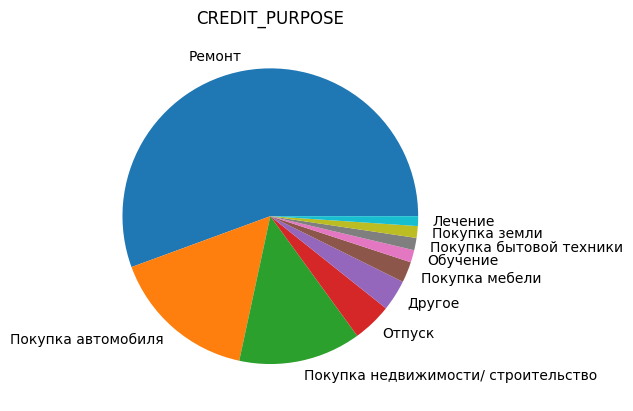

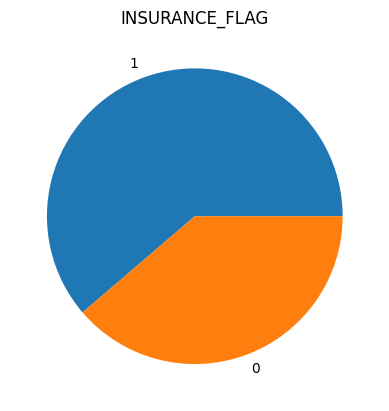

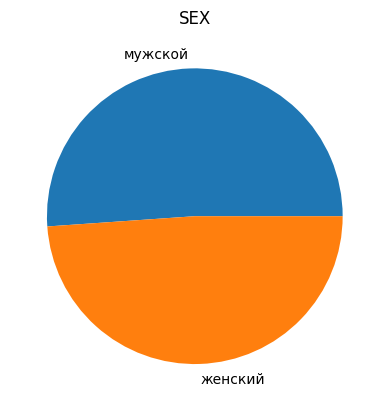

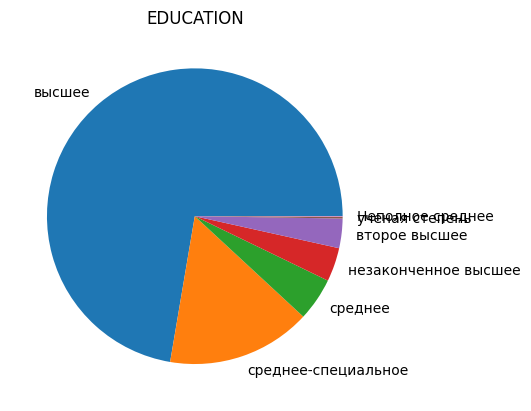

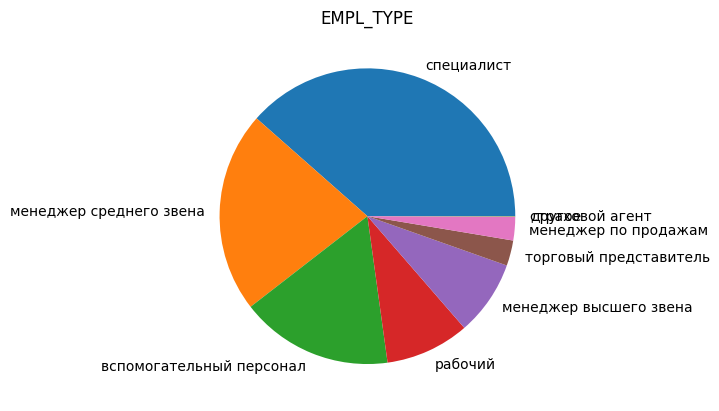

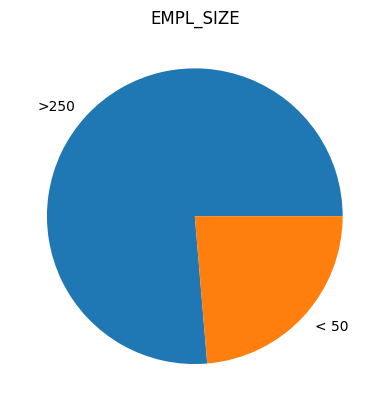

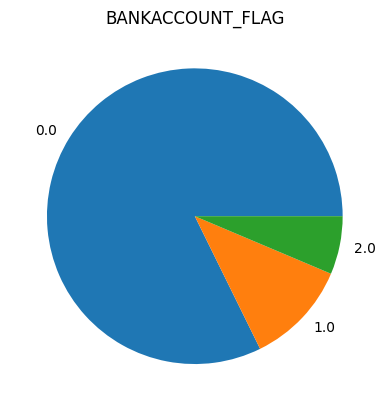

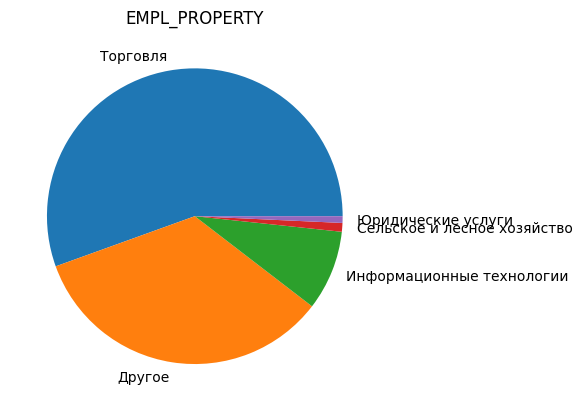

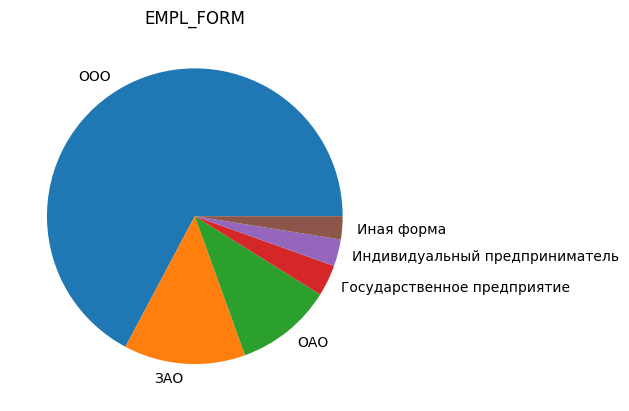

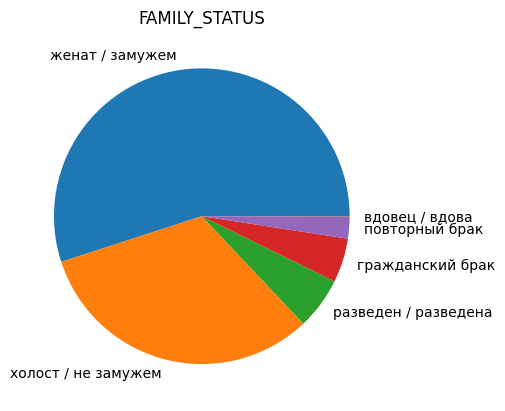

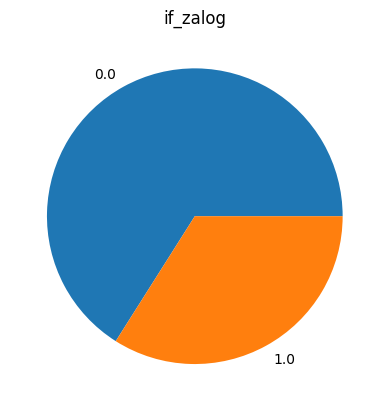

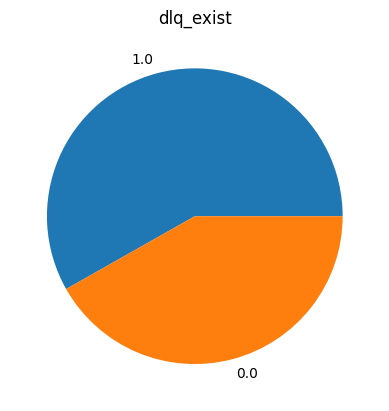

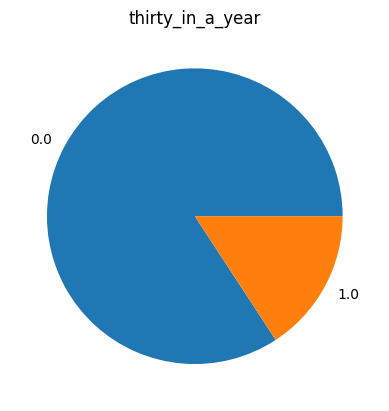

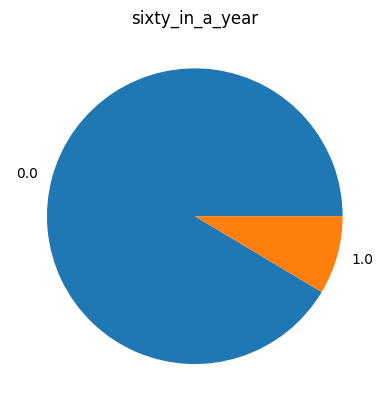

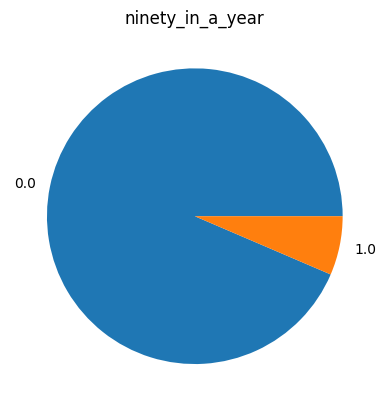

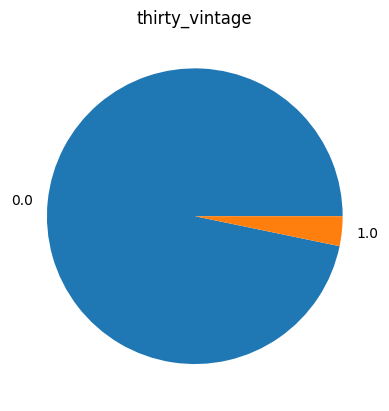

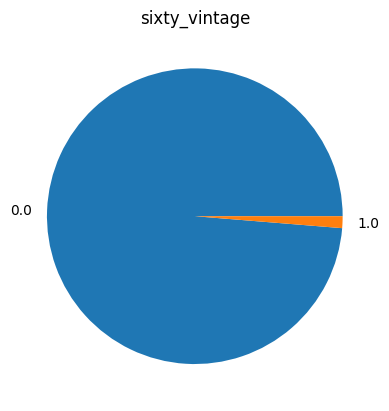

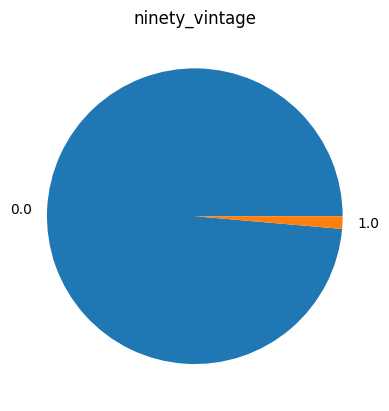

In [151]:
categories = data.select_dtypes(include = 'object')
for category in categories.columns:
    plt.figure()
    plt.pie(categories[category].value_counts(), labels = categories[category].value_counts().index)
    plt.title(category)
    plt.show()

**Выводы по распределениям категориальных переменных:**

* Наибольший дисбаланс классов наблюдается у переменных thirty_in_a_year,	sixty_in_a_year,	ninety_in_a_year,	thirty_vintage,	sixty_vintage,	ninety_vintage.
* Наиболее частое подтверждение дохода - Поступление зарплаты на счет.
* Значения переменной, отвечающей за пол, распределены примерно поровну.
В EDUCATION высшее образование является явно доминирующим значением. Это может быть связано с тем, что мы объединили в этой переменной как "высшее" образование, так и "Высшее/Второе высшее/Ученая степень".
* В топ-3 по частоте переменной EMPL_TYPE входят специалист, менеджер среднего звена и вспомогательный персонал.
* После обработки знчаений и удаления пропусков у переменной EMPL_SIZE осталось всего 2 значения: заработная плата составляет >250 и <50 тыс. руб. в месяц. При этом интересно, что доминирующим классом является з/п >250 тыс. Вероятно, данные взяты по крупным городам и агломерациям, таким как Москва и Московская область.
* По распределению значений переменной BANKACCOUNT_FLAG видим, что подавляющее число клиентов не имеет онлайн-кабинета.
* БОльшая часть работодателей относится либо к сфере Торговли, либо к сферам, информации о которых нет в датасете.
* Доминирующая организационно-правовая форма - ООО.
* Большинство клиентов состоят в браке, не имеют залога для кредита, имеют просрочку по выплатам, а также страховку.


**Посмотрим на матрицу корреляций после обработки датасета**

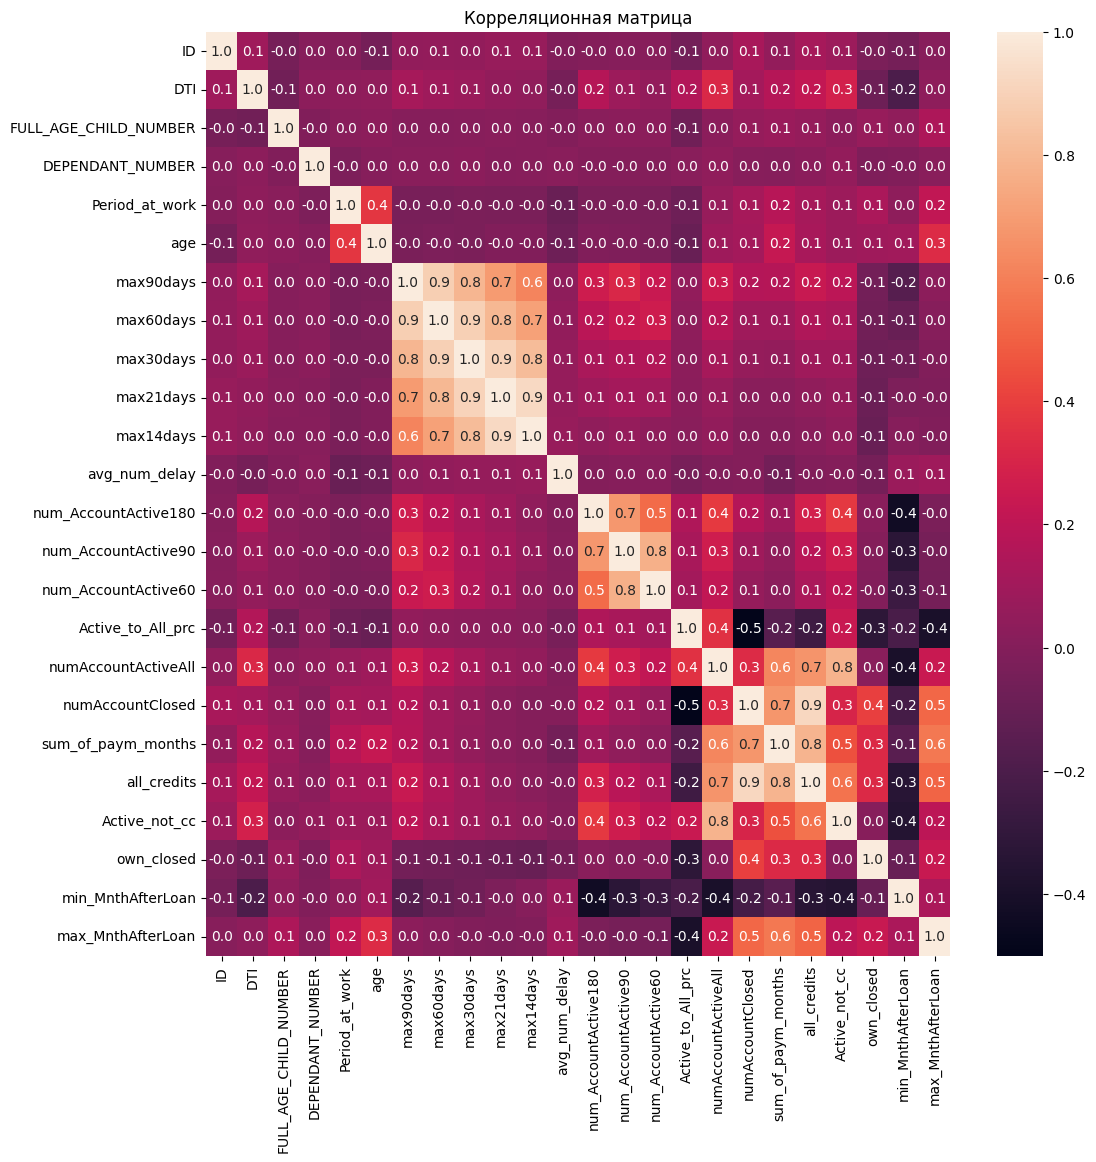

In [152]:
plt.figure(figsize = (12, 12))
plt.title('Корреляционная матрица')
sns.heatmap(data.corr(), annot = True, fmt='.1f');

Видим, что она изменилась, но не слишком сильно. Например, корреляция между переменными avg_num_delay и min_MnthsAfterLoan стала 0.1 вместо 0.3. Тем не менее, значительных изменений, которые могут исказить результаты дальнейшей работы, обнаружено не было.

# Выводы по Части 1

* Рассчитали количество уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва;

* Рассчитали статистические показатели по переменным в предоставленных данных;

* Посмотрели типы данных и поменяли их для некоторых категориальных переменных, которые воспринимались как количественные;

* Исследовали рапсределения данных по категориальным переменным, в некоторых из них обнаружили сильный дисбаланс классов;

* Сделали проверку на некорректную запись значений: в переменных EDUCATION и EMPL_SIZE пропуски обозначались как "* n.a. *", из=за чего количество пропусков считалось неверно;

* В переменной EMPL_SIZE объединили значения >100 и >=100, в переменной BANKACCOUNT_FLAG объединили значения 2,3,4 в 2 (согласно описанию данных), в переменной EDUCATION объединили неоднозначное значение 'Высшее/Второе высшее/Ученая степень' с часто встречающимся значением 'высшее' для улучшения интерпретации;

* Удалили пропуски в категориальных переменных, так как их восстановление могло привести к искажениям, и заполнили пропуски методом импутации среднего в количественных переменных;

* Подготовили финальную витрину с корректными значениями.


# **Часть 2**

**RFM сегментация**

В результате RFM-анализа планируется получить 5 сегментов, выделенных в зависимости от 3 показателей:


*   Recency (давность оформления кредита)
*   Frequency (частота оформления кредитов)
*   Monetary (сумма платежей)

За **Recency** было решено принять переменную **min_MnthAfterLoan** (минимальное кол-во месяцев, которое прошло с момета взятия прошлого кредита, то есть как давно выдали последний кредит клиенту).

За **Frequency** отвечает переменная **all_credits** (количество кредитов).

В качестве **Monetary** была взята переменная **sum_of_paym_months**, обозначающая сумму платежей за последний месяц (тыс.)

**Почему был выбран RFM-анализ?:**


*   Легкость в выполнении и интерпретации;
*   RFM‑анализ позволяет найти самых лояльных клиентов, которые приносят больше всего денег и самых неактивных клиентов;
*   У нас достаточно большая клиентская база (даже после удаления части наблюдений). Это важно, так как RFM-анализ чувствителен к объему выборки (на маленькой он может быть неэффективен);
*   RFM-анализ не прогнозирует, а систематизирует уже имеющиеся массивы данных, что и требуется для выполнения поставленной перед нами задачи.











In [153]:
RFM = data[['min_MnthAfterLoan', 'all_credits', 'sum_of_paym_months']].rename(columns = {'min_MnthAfterLoan':'Recency',
                                                                                               'all_credits': 'Frequency',
                                                                                               'sum_of_paym_months': 'Monetary'})
RFM

,Recency,Frequency,Monetary
2,3.0,1.0,3.0
7,9.0,10.0,130.0
11,3.0,7.0,44.0
13,19.0,2.0,20.0
14,13.0,6.0,48.0
...,...,...,...
10231,25.0,4.0,90.0
10235,0.0,14.0,132.0
10239,3.0,23.0,185.0
10240,9.0,8.0,71.0


In [154]:
RFM.describe()

,Recency,Frequency,Monetary
count,3567.000000,3567.000000,3567.000000
mean,13.763947,5.814971,82.631904
std,15.166576,4.079066,71.164143
min,-1.000000,1.000000,0.000000
25%,4.000000,3.000000,30.500000
50%,9.000000,5.000000,65.000000
75%,18.000000,8.000000,114.000000
max,171.000000,34.000000,584.000000


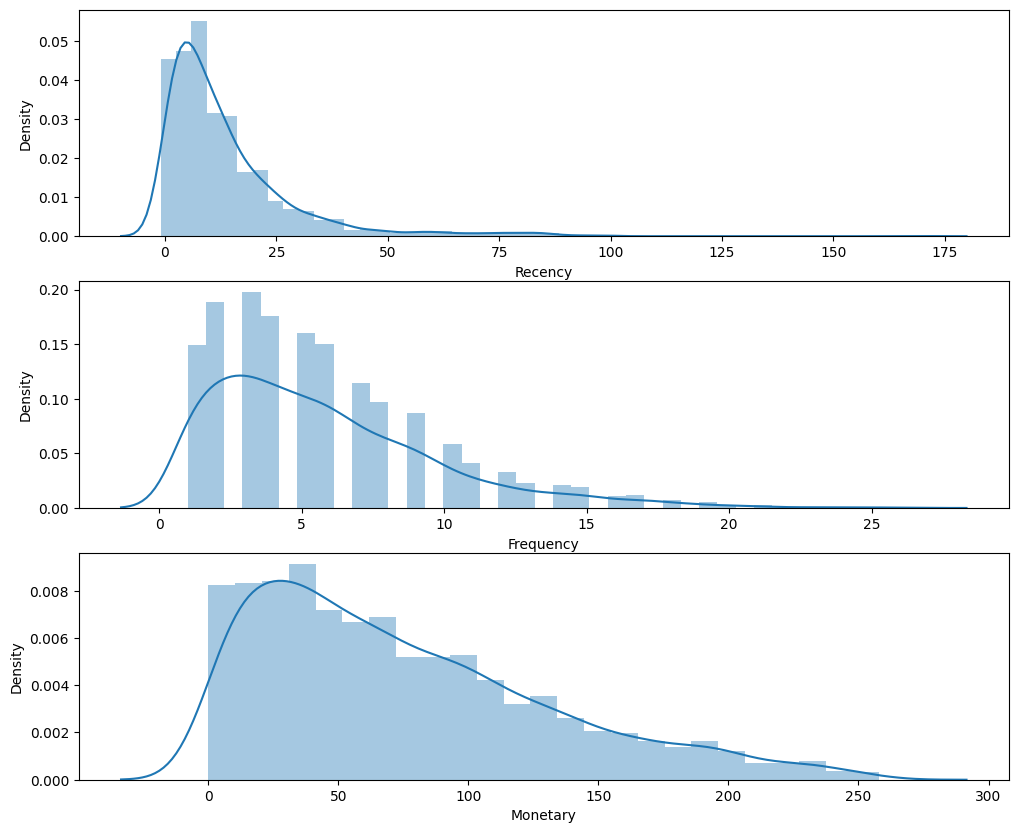

In [155]:
# График рапсределений RFM
plt.figure(figsize=(12,10))

# График распределения R
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])

# График распределения F
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'][RFM['Frequency'] < RFM['Frequency'].quantile(0.999)])

# График распределения M
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'][RFM['Monetary'] < RFM['Monetary'].quantile(0.97)])

plt.show()

In [156]:
quantiles = RFM.quantile(q = [0.25,0.5,0.75]).to_dict()
quantiles

{'Recency': {0.25: 4.0, 0.5: 9.0, 0.75: 18.0},
 'Frequency': {0.25: 3.0, 0.5: 5.0, 0.75: 8.0},
 'Monetary': {0.25: 30.5, 0.5: 65.0, 0.75: 114.0}}

Необходимо проставить оценки от 1 до 4, где 1 - наименее предпочтительно, 4 - наиболее предпочтительно.




In [157]:
# Код для этой части RFM-анализа взят из источника: https://habr.com/ru/companies/otus/articles/666862/

RFM_Segment = RFM.copy()
# Aргументы (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
# Для Recency нам предпочтительнее, чтобы срок с последнего оформления кредита был минимальным.
# Поэтому значениям первого квантиля даем оценку 4

def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Aргументы (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
# Для Frequency нам предпочтительнее, чтобы частота оформления кредита и сумма платежей были максимальны
# Поэтому значениям первого квантиля даем оценку 1

def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args =('Recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args =('Frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(FM_Class, args =('Monetary',quantiles,))
RFM_Segment['RFM_Score'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [158]:
# Считаем количество уникальных сегментов
rfm_count_unique = RFM_Segment.groupby('RFM_Score')['RFM_Score'].nunique()
print('Number of unique segments:', rfm_count_unique.sum())

Number of unique segments: 56


In [159]:
# Суммируем значения по показателям, получаем переменную RFM_Score
RFM_Segment['RFM_Score'] = RFM_Segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
print(RFM_Segment['RFM_Score'].to_frame().head())

    RFM_Score
2           6
7          11
11          9
13          3
14          7


In [160]:
# Даем названия сегментам, основываясь на значениях, полученных в ячейке выше. Создаем для названий новую переменную RFM_Level
# Код для RFM-сегментации здесь и далее взят из тетрадки Clasterization_All_Methods

def rfm_level(df):
    if df['RFM_Score'] >= 11:
        return 'Лучшие клиенты'
    elif ((df['RFM_Score'] >= 9) and (df['RFM_Score'] < 11)):
        return 'Перспективные клиенты'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9)):
        return 'Постоянные клиенты'
    elif (df['RFM_Score'] == 6):
        return 'Клиенты на пороге оттока'
    elif ((df['RFM_Score'] >= 3) and (df['RFM_Score'] < 6)):
        return 'Потерянные клиенты'
    else:
        return 'Require Activation' # Если клиент не рапсределен ни в один из сегментов

RFM_Segment['RFM_Level'] = RFM_Segment.apply(rfm_level, axis=1)
RFM_Segment

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,RFM_Level
2,3.0,1.0,3.0,4,1,1,6,Клиенты на пороге оттока
7,9.0,10.0,130.0,3,4,4,11,Лучшие клиенты
11,3.0,7.0,44.0,4,3,2,9,Перспективные клиенты
13,19.0,2.0,20.0,1,1,1,3,Потерянные клиенты
14,13.0,6.0,48.0,2,3,2,7,Постоянные клиенты
...,...,...,...,...,...,...,...,...
10231,25.0,4.0,90.0,1,2,3,6,Клиенты на пороге оттока
10235,0.0,14.0,132.0,4,4,4,12,Лучшие клиенты
10239,3.0,23.0,185.0,4,4,4,12,Лучшие клиенты
10240,9.0,8.0,71.0,3,3,3,9,Перспективные клиенты


In [161]:
# Проверяем, есть ли клиенты, не подходящие ни под один из 5 сегментов
# Видим, что таких клиентов нет
RFM_Segment[RFM_Segment['RFM_Level'] == 'Require Activation']

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score,RFM_Level


In [162]:
!pip install squarify
import squarify

In [163]:
# Вычислztv средние значения для каждого RFM_Level и определяем размер каждого сегмента
rfm_level_agg = RFM_Segment.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
print(rfm_level_agg)

                         Recency Frequency Monetary      
                            mean      mean     mean count
RFM_Level                                                
Клиенты на пороге оттока    12.1       3.4     43.2   438
Лучшие клиенты               3.6      12.3    176.0   546
Перспективные клиенты        8.0       8.0    119.3   728
Постоянные клиенты          11.8       5.4     76.9   818
Потерянные клиенты          25.3       2.2     28.9  1037


Видим, что сегменты получаются достаточно сбалансированными. Тем не менее, выделяются Потерянные клиенты, их большому количеству следует уделить особое внимание.

In [164]:
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

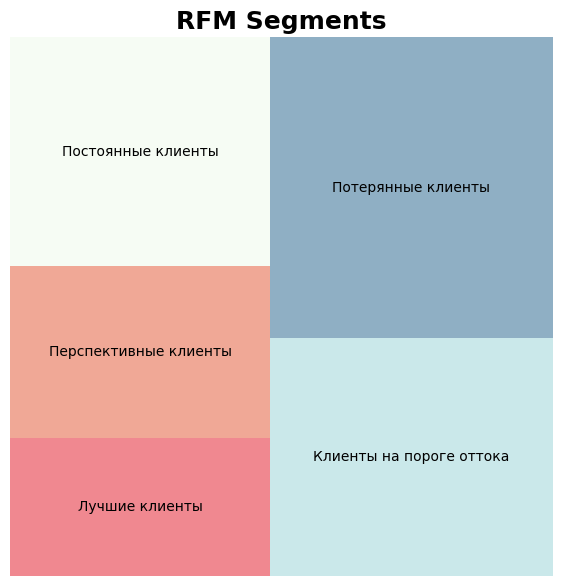

In [165]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(7, 7)
squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Лучшие клиенты',
                     'Перспективные клиенты',
                     'Постоянные клиенты',
                     'Клиенты на пороге оттока',
                     'Потерянные клиенты'],
              color=['#e63946',
                     '#e76f51',
                     '#f1faee',
                     '#a8dadc',
                     '#457b9d'],
              alpha=.6,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [166]:
Segments = RFM_Segment['RFM_Level'].to_frame().join(data).set_index('RFM_Level')
Segments

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
RFM_Level,,,,,,,,,,,,,,,,,,,,,
Клиенты на пороге оттока,1000050,2НДФЛ,Ремонт,1,0.31,женский,0,0,незаконченное высшее,специалист,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Лучшие клиенты,1000150,Свободная форма с печатью работодателя,Ремонт,0,0.47,мужской,0,0,высшее,вспомогательный персонал,...,1.0,9.0,86.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Перспективные клиенты,1000230,2НДФЛ,Ремонт,1,0.49,женский,0,0,высшее,специалист,...,0.0,3.0,38.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Потерянные клиенты,1000270,Форма банка (без печати работодателя),Ремонт,1,0.45,мужской,0,0,незаконченное высшее,вспомогательный персонал,...,1.0,19.0,101.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Постоянные клиенты,1000290,Свободная форма с печатью работодателя,Ремонт,1,0.25,мужской,0,0,высшее,менеджер среднего звена,...,0.0,13.0,68.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Клиенты на пороге оттока,1204630,Свободная форма с печатью работодателя,Ремонт,0,0.27,мужской,0,0,высшее,менеджер высшего звена,...,0.0,25.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Лучшие клиенты,1204710,Поступление зарплаты на счет,Ремонт,0,0.57,мужской,0,0,высшее,специалист,...,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Лучшие клиенты,1204790,2НДФЛ,Ремонт,1,0.46,мужской,1,0,высшее,менеджер среднего звена,...,0.0,3.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
lost_mode = Segments.select_dtypes(include = ['object']).loc['Потерянные клиенты'].mode().iloc[0].to_frame()
lost_mean = Segments.drop('ID', axis = 1).select_dtypes(exclude = ['object']).loc['Потерянные клиенты'].mean().to_frame()
frames_1 = [lost_mode, lost_mean]
pd.concat(frames_1)


,0
INCOME_BASE_TYPE,Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт
INSURANCE_FLAG,1
SEX,мужской
EDUCATION,высшее
EMPL_TYPE,специалист
EMPL_SIZE,>250
BANKACCOUNT_FLAG,0.0
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО


In [168]:
outflow_mode = Segments.select_dtypes(include = ['object']).loc['Клиенты на пороге оттока'].mode().iloc[0].to_frame()
outflow_mean = Segments.drop('ID', axis = 1).select_dtypes(exclude = ['object']).loc['Клиенты на пороге оттока'].mean().to_frame()
frames_2 = [outflow_mode, outflow_mean]
pd.concat(frames_2)

,0
INCOME_BASE_TYPE,Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт
INSURANCE_FLAG,1
SEX,мужской
EDUCATION,высшее
EMPL_TYPE,специалист
EMPL_SIZE,>250
BANKACCOUNT_FLAG,0.0
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО


In [169]:
loyal_mode = Segments.select_dtypes(include = ['object']).loc['Постоянные клиенты'].mode().iloc[0].to_frame()
loyal_mean = Segments.drop('ID', axis = 1).select_dtypes(exclude = ['object']).loc['Постоянные клиенты'].mean().to_frame()
frames_3 = [loyal_mode, loyal_mean]
pd.concat(frames_3)

,0
INCOME_BASE_TYPE,Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт
INSURANCE_FLAG,1
SEX,мужской
EDUCATION,высшее
EMPL_TYPE,специалист
EMPL_SIZE,>250
BANKACCOUNT_FLAG,0.0
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО


In [170]:
perspective_mode = Segments.select_dtypes(include = ['object']).loc['Перспективные клиенты'].mode().iloc[0].to_frame()
perspective_mean = Segments.drop('ID', axis = 1).select_dtypes(exclude = ['object']).loc['Перспективные клиенты'].mean().to_frame()
frames_4 = [perspective_mode, perspective_mean]
pd.concat(frames_4)

,0
INCOME_BASE_TYPE,Форма банка (без печати работодателя)
CREDIT_PURPOSE,Ремонт
INSURANCE_FLAG,1
SEX,мужской
EDUCATION,высшее
EMPL_TYPE,специалист
EMPL_SIZE,>250
BANKACCOUNT_FLAG,0.0
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО


In [171]:
best_mode = Segments.select_dtypes(include = ['object']).loc['Лучшие клиенты'].mode().iloc[0].to_frame()
best_mean = Segments.drop('ID', axis = 1).select_dtypes(exclude = ['object']).loc['Лучшие клиенты'].mean().to_frame()
frames_5 = [best_mode, best_mean]
pd.concat(frames_5)

,0
INCOME_BASE_TYPE,Форма банка (без печати работодателя)
CREDIT_PURPOSE,Ремонт
INSURANCE_FLAG,1
SEX,женский
EDUCATION,высшее
EMPL_TYPE,специалист
EMPL_SIZE,>250
BANKACCOUNT_FLAG,0.0
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО


**Сегменты**

**Сегмент 1 "Потерянные клиенты":**


*   Женатый мужчина 35 лет
*   Цель кредита: Ремонт
*   Специалист с высшим образованием с з/п > 250 тыс. руб. в месяц
*   Имеющий в среднем 2 кредита, страховку и без просрочки
*   Сумма платежей составляет 29 тыс. руб. за последний месяц
*   Минимальное время, прошедшее с оформления последнего кредита: 25 месяцев

Выводы по сегменту: видим, что последняя активность была более 2х лет назад, при этом клиент платежеспособный (квалифицированный специалист с хорошим доходом), а также ответственный при выполнении своих обязательств. Цель банка - вернуть таких клиентов. Для этого необходимо предложить индивидуальные условия договора, скидки и тд.

**Сегмент 2 "Клиенты на пороге оттока":**


*   Женатый мужчина 35 лет
*   Цель кредита: Ремонт
*   Специалист с высшим образованием с з/п > 250 тыс. руб. в месяц
*   Имеющий в среднем 3 кредита, страховку и без просчрочки
*   Сумма платежей составляет 43 тыс. руб. за последний месяц
*   Минимальное время, прошедшее с оформления последнего кредита: 12 месяцев

Выводы по сегменту: последняя активность год назад, клиент также платежеспособный и ответственный. Его сумма платежей и количество кредитов выше, чем у клиентов предыдущего сегмента. Цель банка - удержание, чего также можно добиться индивидуальным подходом.

**Сегмент 3 "Постоянные клиенты":**


*   Женатый мужчина 35 лет
*   Цель кредита: Ремонт
*   Специалист с высшим образованием с з/п > 250 тыс. руб. в месяц
*   Имеющий в среднем 5 кредитов, страховку и просрочку
*   Сумма платежей составляет 77 тыс. руб. за последний месяц
*   Минимальное время, прошедшее с оформления последнего кредита: 12 месяцев

Выводы по сегменту: видим, что клиент платежеспособный, имеет достаточно много кредитов, однако у него имеется просрочка, на что банку следует обратить внимание. Цель банка в случае постоянных клиентов - стимулирование на большую активность. Это семейные люди, которым можно предложить кредит на покупку автомобиля или отпуск.

**Сегмент 4 "Перспективные клиенты":**


*   Женатый мужчина 37 лет
*   Цель кредита: Ремонт
*   Специалист с высшим образованием с з/п > 250 тыс. руб. в месяц
*   Имеющий в среднем 8 кредитов, страховку и просрочку
*   Сумма платежей составляет 119 тыс. руб. за последний месяц
*   Минимальное время, прошедшее с оформления последнего кредита: 8 месяцев

Выводы по сегменту: время, прошедшее с момента оформления последнего кредита, меньше, чем у 3 предыдущих сегментов, видим большое количество займов (8) и достаточно крупную сумму платежей. Таких клиентов необходимо также стимулировать, они могут принести банку дополнительную прибыль. На данный момент у клиента есть просрочка, но до этого он исправно выполнял обазательства (судя по данным, у него нет просрочки более 30 дней за все время и за последний месяц). Важно отследить, разовый это случай или у него начались финансовые трудности, но на данный момент он крайне перспективный клиент  с хорошим уровнем активности.




**Сегмент 5 "Лучшие клиенты":**

*   Замужняя женщина 38 лет
*   Цель кредита: Ремонт
*   Специалист с высшим образованием с з/п > 250 тыс. руб. в месяц
*   Имеющая в среднем 12 кредитов, страховку и просрочку
*   Сумма платежей составляет 176 тыс. руб. за последний месяц
*   Минимальное время, прошедшее с оформления последнего кредита: 4 месяца

Выводы по сегменту: платежеспособный клиент с хорошим доходом, более половины заработной платы идет на платежи банку, однако женщина замужем, так что, наиболее вероятно, есть также финансовая поддержка со стороны мужа. Просрочки более 30 дней не обнаружили, это хороший знак, несмотря на наличие просрочки в настоящий момент. Таких клиентов важно удерживать и стимулировать на дальнейшую активность, так как они пользуются услугами банка наиболее часто и вносят большие суммы платежей.







 **Дерево решений**

**Почему было выбрано Дерево решений?:**


*   Результаты хорошо интерпретируются;
*   Можно обрабатывать как непрерывные, так и качественные переменные (а у нас в датасете много категориальных переменных);
*   Выделенные сегменты не зависят от субъективных факторов;
*   Сложность: результат сильно зависит от выбранных признаков и таргета, необходимо учитывать баланс классов.





In [172]:
data['INCOME_BASE_TYPE'].value_counts()

Поступление зарплаты на счет              1214
Форма банка (без печати работодателя)     1060
2НДФЛ                                      936
Свободная форма с печатью работодателя     357
Name: INCOME_BASE_TYPE, dtype: int64

Из графиков, представленных в части 1 видим, что наиболее однородно распределены значения в переменной INCOME_BASE_TYPE. Возьмем ее в качестве таргета при построении дерева решений. Баланс классов у целевой переменной важен для того, чтобы классификатор предсказывал не только доминирующий класс. В качестве признаков возьмем те переменные, которые достаточно легко интерпретировать.

In [173]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [174]:
# Для того, чтобы иметь возможность обратиться к целевой переменной, перекодируем ее значения в целочисленные.
# Это поможет избежать проблем после преобразования переменных датасета в дамми-переменные.

data['INCOME_BASE_TYPE'].replace({'Поступление зарплаты на счет' : 1, 'Форма банка (без печати работодателя)' : 2,
                                  '2НДФЛ' : 3, 'Свободная форма с печатью работодателя' : 4}, inplace = True)

tree_data = pd.get_dummies(data[['INCOME_BASE_TYPE','SEX','DTI','dlq_exist','CREDIT_PURPOSE','age','all_credits',
                                 'FAMILY_STATUS', 'EDUCATION','EMPL_PROPERTY','if_zalog', 'numAccountActiveAll','Period_at_work',
                                 'sum_of_paym_months','EMPL_SIZE']], drop_first = True)
tree_data.head()

,INCOME_BASE_TYPE,DTI,age,all_credits,numAccountActiveAll,Period_at_work,sum_of_paym_months,SEX_мужской,dlq_exist_1.0,CREDIT_PURPOSE_Лечение,...,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,if_zalog_1.0,EMPL_SIZE_>250
2,3,0.31,24.0,1.0,1.0,18.0,3.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,4,0.47,32.0,10.0,3.0,29.0,130.0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
11,3,0.49,25.0,7.0,3.0,29.0,44.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13,2,0.45,34.0,2.0,0.0,109.0,20.0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
14,4,0.25,31.0,6.0,4.0,8.0,48.0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [175]:
y = tree_data['INCOME_BASE_TYPE'] # Определили таргет
X = tree_data.drop('INCOME_BASE_TYPE', axis = 1) # Определили признаки
model = DecisionTreeRegressor(max_depth = 5) # Ограничили глубину дерева, чтобы получить более читаемые результаты
model.fit(X, y)
y_pred = model.predict(X)

In [176]:
# y_pred имеет нецелочисленные значения, поэтому мы их округляем для упрощения дальнейшей интепретации
tree_data['tree_segment'] = list(map(round, y_pred))

for i, n in tree_data.groupby('tree_segment'):
    print(f'Наиболее часто встречающиеся признаки для сегмента {i}:')
    print(n.drop('tree_segment', axis = 1).mode().iloc[0])
    print()

Наиболее часто встречающиеся признаки для сегмента 1:
INCOME_BASE_TYPE                                       1.00
DTI                                                    0.49
age                                                   23.00
all_credits                                            1.00
numAccountActiveAll                                    1.00
Period_at_work                                         6.00
sum_of_paym_months                                     1.00
SEX_мужской                                            1.00
dlq_exist_1.0                                          0.00
CREDIT_PURPOSE_Лечение                                 0.00
CREDIT_PURPOSE_Обучение                                0.00
CREDIT_PURPOSE_Отпуск                                  0.00
CREDIT_PURPOSE_Покупка автомобиля                      0.00
CREDIT_PURPOSE_Покупка бытовой техники                 0.00
CREDIT_PURPOSE_Покупка земли                           0.00
CREDIT_PURPOSE_Покупка мебели                 

**Сегменты**

**Сегмент 1:**


*   Холостой мужчина 23 лет с з/п >250 тыс. руб. в месяц
*   Имеющий 1 кредит и без просрочек
*   Сфера бизнеса работодателя: Торговля
*   Сумма платежей за последний месяц: 1 тыс. руб

**Сегмент 2:**
*   Женатый мужчина 28 лет с з/п >250 тыс. руб. в месяц
*   Имеющий 3 кредита и без просрочек
*   Цель кредита: Ремонт
*   Сфера бизнеса работодателя: Торговля
*   Сумма платежей за последний месяц: 17 тыс. руб
*   Имеет высшее образование


**Сегмент 3:**

*   Замужняя женщина 30 лет с з/п <50 тыс. руб. в месяц
*   Имеющая 2 кредита и просрочку
*   Цель кредита: Ремонт
*   Сфера бизнеса работодателя: Торговля
*   Сумма платежей за последний месяц: 44 тыс. руб
*   Имеет высшее образование

**Сегмент 4:**

*   Женатый мужчина 31 года с з/п <50 тыс. руб. в месяц
*   Имеющий 4 кредита и просрочку
*   Сфера бизнеса работодателя: Торговля
*   Сумма платежей за последний месяц: 133 тыс. руб
*   Имеет высшее образование

Средний возраст клиентов в 75% выделенных сегментов - около 30 лет. Я считаю, что это вполне соотносится с реальностью, так как примерно в этот период жизни большая часть молодых людей встает на ноги и приобретает собственное жилье, которое необходимо ремонтировать.

Клиенты, попадающие в сегменты 3 и 4, являются для банка наиболее рискованными, так как размеры помесячных платежей несоизмеримы с заработной платой (в 3 сегменте остающийхся средств не хватит на жизнь, в 4 сегменте сумма платежей значительно превышает заработную плату). Такие клиенты могут обращаться за новыми кредитами, чтобы перекрывать старые, что грозит им банкротством, а банку, оформляющему займ, невыполнением обязательств со стороны заемщика.

Клиенты из 1 и 2 сегментов являются наиболее предпочтительными для банка: они стабильно выполняют обязательства по платежам (без просрочек), и имеют хороший доход. Тем не менее, для банка выгодно стимулировать таких клиентов, предлагая индивидуальные условия и скидки, чтобы повысить их активность, ведь соотношение суммы платежей и заработной платы достаточно мало. Семейным клиентам из 2 сегмента можно предложить кредит на покупку семейного автомобиля или отпуск, холостым клиентам из 1 сегмента - кредит на обучение.








# Выводы по Части 2

Для сегментации было использовано 2 метода: RFM-анализ и Дерево решений.

* Результаты RFM-анализа легче интерпретируются, так как мы изначально экзогенно задаем значениям переменных оценку предпочтительности на основе 3 конкретных признаков.

* В Дереве решений субъективный фактор состоит непосредственно в подборе признаков, дальше модель сама делит данные на сегменты. Этот метод дает более детализированные и разнородные сегменты по сравнению с RFM-анализом.

* У сегментов, выделенных моделями, есть довольно много схожих признаков: чаще других можно встретить ремонт как цель кредита, торговлю как сферу бизнеса работодателя и др. Это может быть связано с выявленными в части 1 дисбалансами классов. Однако различия также присутствуют, например, Дерево решений выделило холостого 23 летнего мужчину в отдельный сегмент, чего не наблюдалось в RFM-анализе, где большинство клиентов состояли в браке.